In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Create an instance of the Huber class with a delta value
#from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
#import tensorflow as tf


In [66]:
# Correct the file path and read the CSV
train = pd.read_csv(r'C:\Users\Lenovo\Desktop\python\Rossman\train.csv')
train.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13644\1478995946.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r'C:\Users\Lenovo\Desktop\python\Rossman\train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [67]:
train['Date'].nunique()

942

In [68]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [69]:
train['Date'].dtypes

dtype('O')

In [70]:
#change date into int
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.strftime('%Y%m%d').astype(int) #changed the format


In [71]:
train['Date'].head()

0    20150731
1    20150731
2    20150731
3    20150731
4    20150731
Name: Date, dtype: int32

In [72]:
#Make train['Date'] into date format
#train['Date'] = pd.to_datetime(train['Date'], format='%Y%m%d') #same format


In [73]:
train['Date'].dtypes

dtype('int32')

In [74]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [75]:
# convert StateHoliday object to int
train['StateHoliday'] = train['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})

Encode the value in int 0:0, a:1, b:2, c:3

In [45]:
# # Convert 'Date' column to numerical features (e.g., ordinal)
# import datetime as dt
# train['Date'] = pd.to_datetime(train['Date']).apply(lambda date: date.toordinal())


In [46]:
X = train.drop('Sales', axis=1)
y = train['Sales']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1017209 non-null  int64  
 1   DayOfWeek      1017209 non-null  int64  
 2   Date           1017209 non-null  int32  
 3   Sales          1017209 non-null  int64  
 4   Customers      1017209 non-null  int64  
 5   Open           1017209 non-null  int64  
 6   Promo          1017209 non-null  int64  
 7   StateHoliday   886137 non-null   float64
 8   SchoolHoliday  1017209 non-null  int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 66.0 MB


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

In [ ]:
# Model Prediction
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred

In [ ]:
#find MAE and MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

In [ ]:
# # # Create an instance of the Huber class with a delta value
# huber_loss_fn = Huber(delta=1.0)
# huber_loss = huber_loss_fn(y_test, y_pred).numpy()
# print(f"Huber Loss: {huber_loss}")

In [ ]:
#Accuracy Score
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

In [ ]:
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

In [ ]:
test_r2

In [ ]:
train_r2

In [ ]:
print(f"Training R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")

# Check overfitting or underfitting
if train_r2 > 0.9 and test_r2 < 0.8:
    print("Model is overfitting.")  # High train score but low test score

elif train_r2 < 0.6 and test_r2 < 0.6:
    print("Model is underfitting.")  # Both scores are low

elif abs(train_r2 - test_r2) < 0.1 and test_r2 >= 0.7:
    print("Model is well-fitted.")  # Scores are close and sufficiently high

else:
    print("Model requires improvement.")  # Borderline cases

In [ ]:
import pickle

In [ ]:
# Save the model as a .pkl file
with open('sales_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as 'finalized_model.pkl'")

# post Predication Analysis

In [32]:
#Assuming you used a Random Forest or XGBoost model
feature_importances = model.feature_importances_
# Create DataFrame for visualization
import pandas as pd
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13644\3071560611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="viridis")


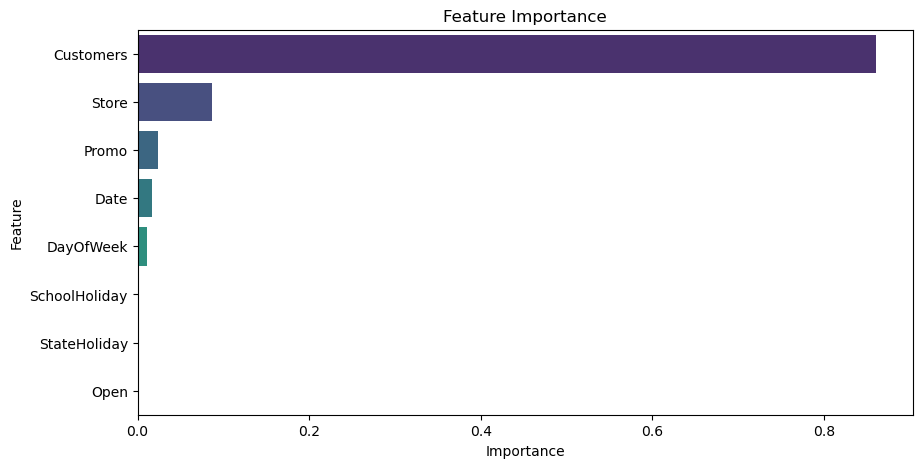

In [33]:
# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="viridis")
plt.title("Feature Importance")
plt.show()